In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df.shape

(112634, 17)

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(" ","_")

df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

**<h3>Renaming Columns**

In [ ]:
df.rename (columns={"Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility": "CAFV_Eligibility"}, inplace = True)
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN_(1-10)             112634 non-null  object 
 1   County                 112634 non-null  object 
 2   City                   112634 non-null  object 
 3   State                  112634 non-null  object 
 4   Postal_Code            112634 non-null  int64  
 5   Model_Year             112634 non-null  int64  
 6   Make                   112634 non-null  object 
 7   Model                  112614 non-null  object 
 8   Electric_Vehicle_Type  112634 non-null  object 
 9   CAFV_Eligibility       112634 non-null  object 
 10  Electric_Range         112634 non-null  int64  
 11  Base_MSRP              112634 non-null  int64  
 12  Legislative_District   112348 non-null  float64
 13  DOL_Vehicle_ID         112634 non-null  int64  
 14  Vehicle_Location       112610 non-nu

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Electric_Utility,443
Legislative_District,286
Vehicle_Location,24
Model,20
VIN_(1-10),0
CAFV_Eligibility,0
DOL_Vehicle_ID,0
Base_MSRP,0
Electric_Range,0
Electric_Vehicle_Type,0


In [ ]:
df_dropna = df.dropna()

df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN_(1-10)             112152 non-null  object 
 1   County                 112152 non-null  object 
 2   City                   112152 non-null  object 
 3   State                  112152 non-null  object 
 4   Postal_Code            112152 non-null  int64  
 5   Model_Year             112152 non-null  int64  
 6   Make                   112152 non-null  object 
 7   Model                  112152 non-null  object 
 8   Electric_Vehicle_Type  112152 non-null  object 
 9   CAFV_Eligibility       112152 non-null  object 
 10  Electric_Range         112152 non-null  int64  
 11  Base_MSRP              112152 non-null  int64  
 12  Legislative_District   112152 non-null  float64
 13  DOL_Vehicle_ID         112152 non-null  int64  
 14  Vehicle_Location       112152 non-null  o

**<h3>Aggregating Numerical and Categorical values**

In [ ]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

**<h3>Univariate Analysis - Statistical Non Visual Analysis**

In [ ]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()
discrete_univariate_analysis(discrete_df)

********** VIN_(1-10) **********
count                                                 112634
nunique                                                 7548
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
Name: VIN_(1-10), dtype: object
Value Counts: 
 VIN_(1-10)
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

********** County **********
count                                                 112634
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
Value Counts: 
 County
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth        1
Kings             1
Kootenai          1
Nam

In [ ]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()
numerical_univariate_analysis(numerical_df)

********** Postal_Code **********
min        1730.000000
max       99701.000000
mean      98156.226850
median    98119.000000
std        2648.733064
Name: Postal_Code, dtype: float64

********** Model_Year **********
min       1997.000000
max       2023.000000
mean      2019.003365
median    2020.000000
std          2.892364
Name: Model_Year, dtype: float64

********** Electric_Range **********
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
Name: Electric_Range, dtype: float64

********** Base_MSRP **********
min            0.000000
max       845000.000000
mean        1793.439681
median         0.000000
std        10783.753486
Name: Base_MSRP, dtype: float64

********** Legislative_District **********
min        1.000000
max       49.000000
mean      29.805604
median    34.000000
std       14.700545
Name: Legislative_District, dtype: float64

********** DOL_Vehicle_ID **********
min       4.777000e+03
max       4.792548e+08
mean

**<h3> Univariate - Visual Analysis**

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

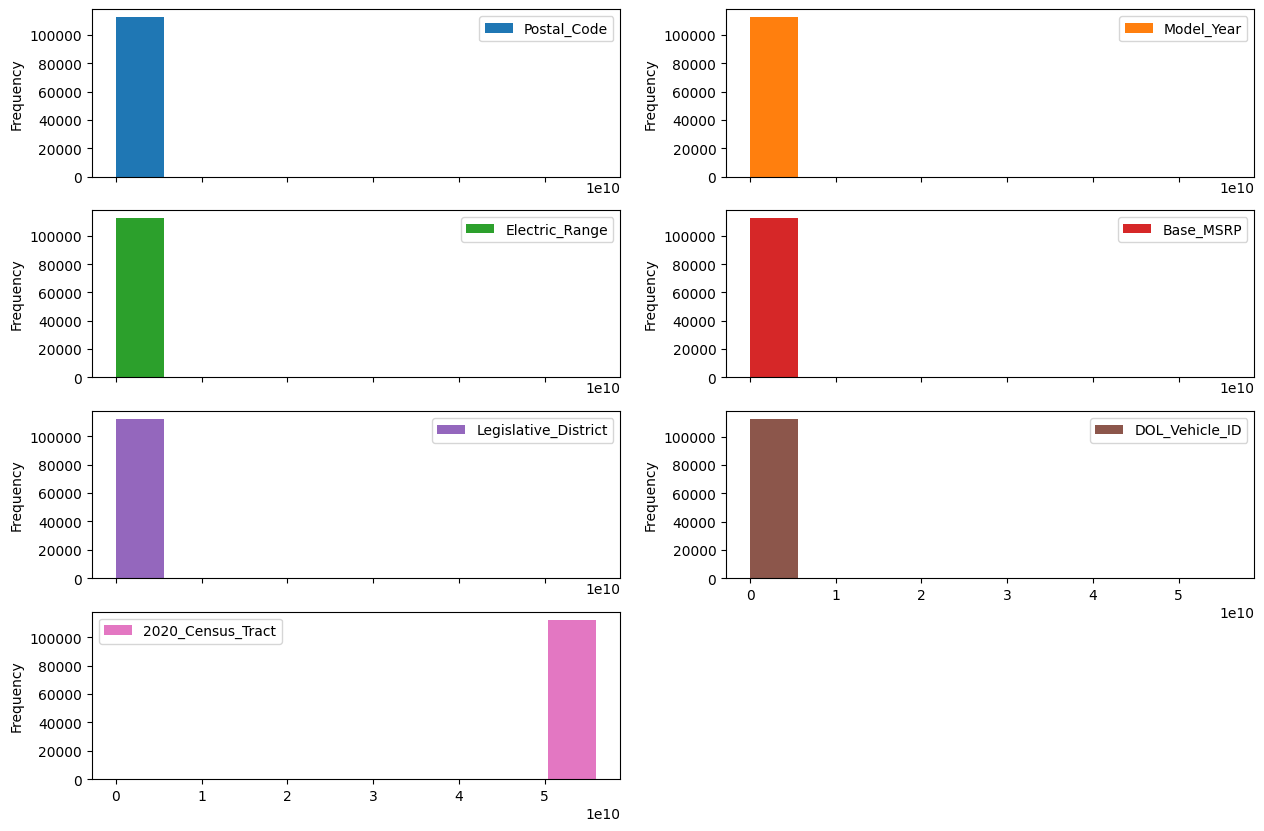

In [ ]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(15, 10))

,0
Postal_Code,"Axes(0.125,0.712609;0.352273x0.167391)"
Model_Year,"Axes(0.547727,0.712609;0.352273x0.167391)"
Electric_Range,"Axes(0.125,0.511739;0.352273x0.167391)"
Base_MSRP,"Axes(0.547727,0.511739;0.352273x0.167391)"
Legislative_District,"Axes(0.125,0.31087;0.352273x0.167391)"
DOL_Vehicle_ID,"Axes(0.547727,0.31087;0.352273x0.167391)"
2020_Census_Tract,"Axes(0.125,0.11;0.352273x0.167391)"


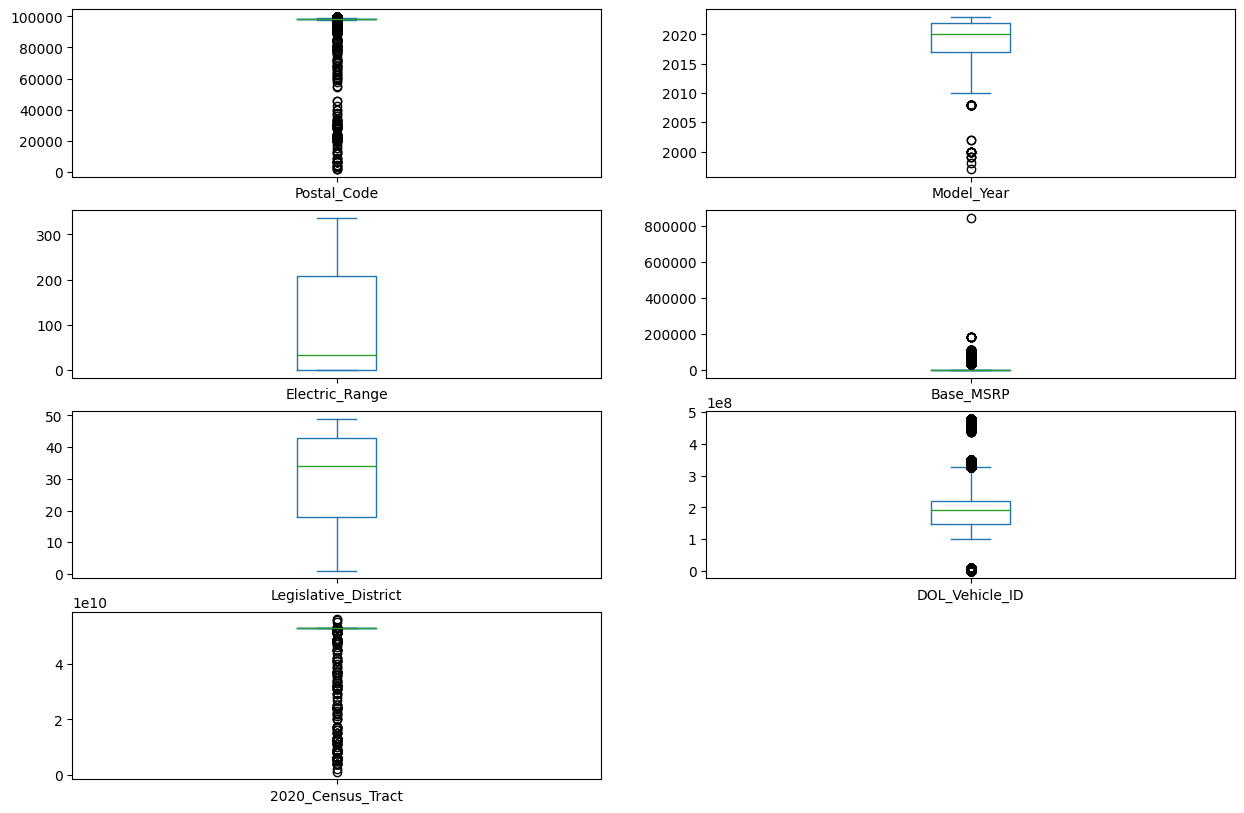

In [ ]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(15, 10))

<Axes: >

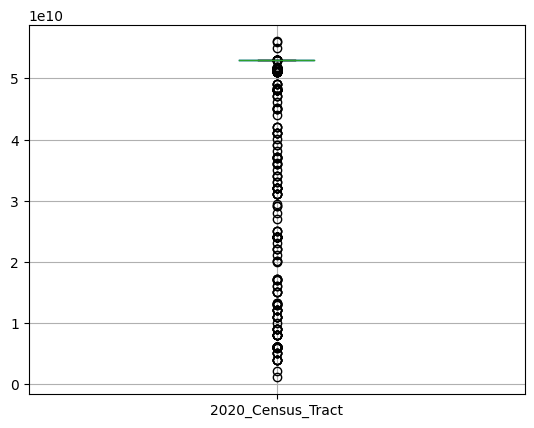

In [ ]:
df.boxplot(column = "2020_Census_Tract")

**<h3>Bivariate Analysis**

In [ ]:
numerical_df.corr()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
Postal_Code,1.000000,-0.004485,0.000385,0.001151,-0.433405,0.003365,0.501170
Model_Year,-0.004485,1.000000,-0.288433,-0.229130,0.010439,-0.068295,0.000714
Electric_Range,0.000385,-0.288433,1.000000,0.085025,0.024387,0.009682,0.000722
Base_MSRP,0.001151,-0.229130,0.085025,1.000000,0.012426,0.000504,0.000979
Legislative_District,-0.433405,0.010439,0.024387,0.012426,1.000000,-0.001671,-0.111991
DOL_Vehicle_ID,0.003365,-0.068295,0.009682,0.000504,-0.001671,1.000000,0.002754
2020_Census_Tract,0.501170,0.000714,0.000722,0.000979,-0.111991,0.002754,1.000000


In [ ]:
numerical_df.columns

Index(['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', 'DOL_Vehicle_ID', '2020_Census_Tract'],
      dtype='object')

**<h3>Continuous vs Continuous**

<Axes: xlabel='Model_Year', ylabel='Electric_Range'>

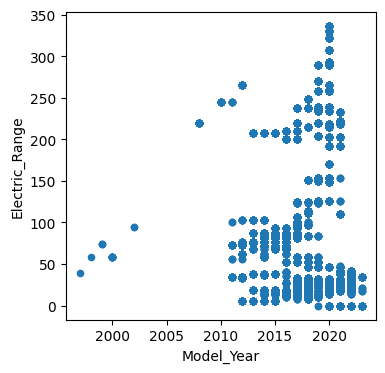

In [ ]:
df.plot(kind='scatter', x='Model_Year', y='Electric_Range', figsize=(4, 4))

In [ ]:
df = df.loc[df['Base_MSRP'] < 80000]

<Axes: xlabel='Model_Year', ylabel='Base_MSRP'>

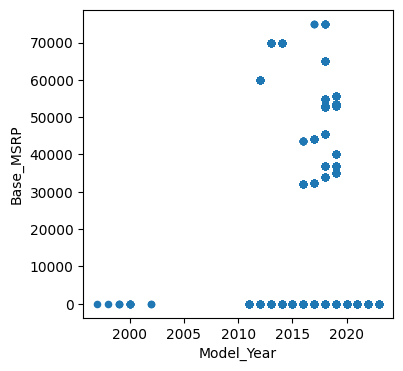

In [ ]:
df.plot(kind='scatter', x='Model_Year', y='Base_MSRP', figsize=(4, 4))

**<h3>Discrete vs Discrete**

In [ ]:
discrete_df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

In [ ]:
pd.crosstab(df['Model_Year'], df['CAFV_Eligibility'], normalize = True)

CAFV_Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Model_Year,,,
1997,0.000009,0.000000,0.000000
1998,0.000009,0.000000,0.000000
1999,0.000027,0.000000,0.000000
2000,0.000089,0.000000,0.000000
2002,0.000018,0.000000,0.000000
2011,0.007405,0.000000,0.000000
2012,0.011645,0.000000,0.003333
2013,0.034098,0.000000,0.007600
2014,0.025743,0.000000,0.007013


<Axes: ylabel='Model_Year'>

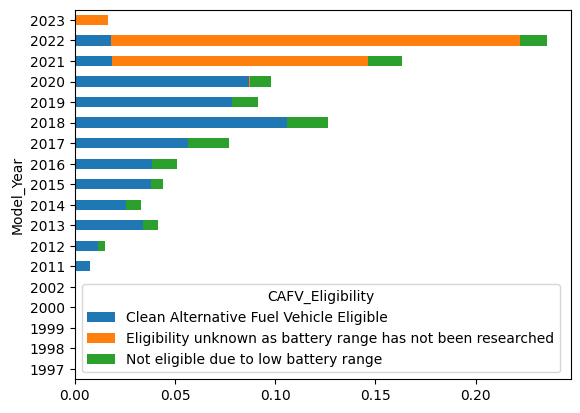

In [ ]:
tab = pd.crosstab(df['Model_Year'], df['CAFV_Eligibility'], normalize = True)
tab.plot(kind='barh', stacked=True)

In [ ]:
pd.crosstab(df['Model_Year'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model_Year,,
1997,1,0
1998,1,0
1999,3,0
2000,10,0
2002,2,0
2011,762,71
2012,814,871
2013,3018,1673
2014,1864,1821


<Axes: ylabel='Model_Year'>

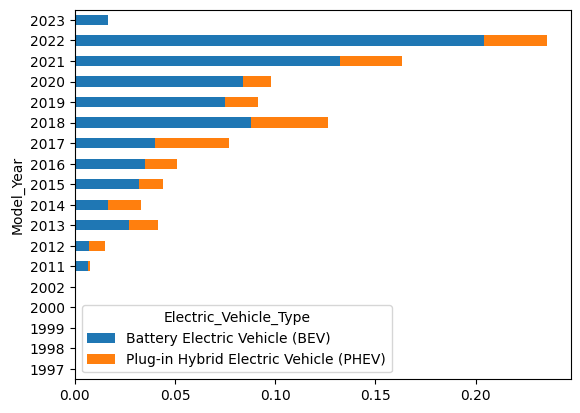

In [ ]:
tab = pd.crosstab(df['Model_Year'], df['Electric_Vehicle_Type'], normalize = True)
tab.plot(kind='barh', stacked=True)

**<h3>Discrete Vs Continuous**

In [ ]:
group = df.groupby('Model')
group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Model,,,,
330E,2016,2022,2018.983498,2018.0
500,2013,2019,2015.447689,2015.0
530E,2018,2022,2018.727554,2018.0
745E,2020,2020,2020.000000,2020.0
745LE,2022,2022,2022.000000,2022.0
...,...,...,...,...
X3,2020,2021,2020.726027,2021.0
X5,2016,2022,2019.914712,2021.0
XC40,2021,2023,2021.507071,2022.0


In [ ]:
group = df.groupby('Electric_Vehicle_Type')
group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Electric_Vehicle_Type,,,,
Battery Electric Vehicle (BEV),1997,2023,2019.356425,2020.0
Plug-in Hybrid Electric Vehicle (PHEV),2011,2023,2017.884299,2018.0


In [ ]:
group = df.groupby('CAFV_Eligibility')
group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
CAFV_Eligibility,,,,
Clean Alternative Fuel Vehicle Eligible,1997,2023,2017.496850,2018.0
Eligibility unknown as battery range has not been researched,2019,2023,2021.677261,2022.0
Not eligible due to low battery range,2012,2023,2017.915493,2018.0


<Axes: title={'center': 'Model_Year'}, xlabel='Electric_Vehicle_Type'>

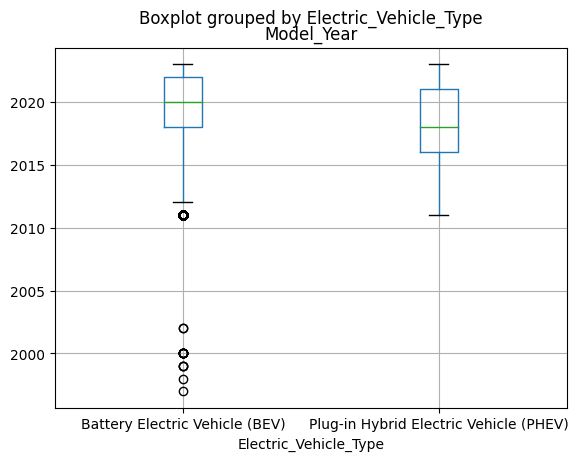

In [ ]:
df.boxplot(by="Electric_Vehicle_Type",column=['Model_Year'])

<Axes: title={'center': 'Model_Year'}, xlabel='CAFV_Eligibility'>

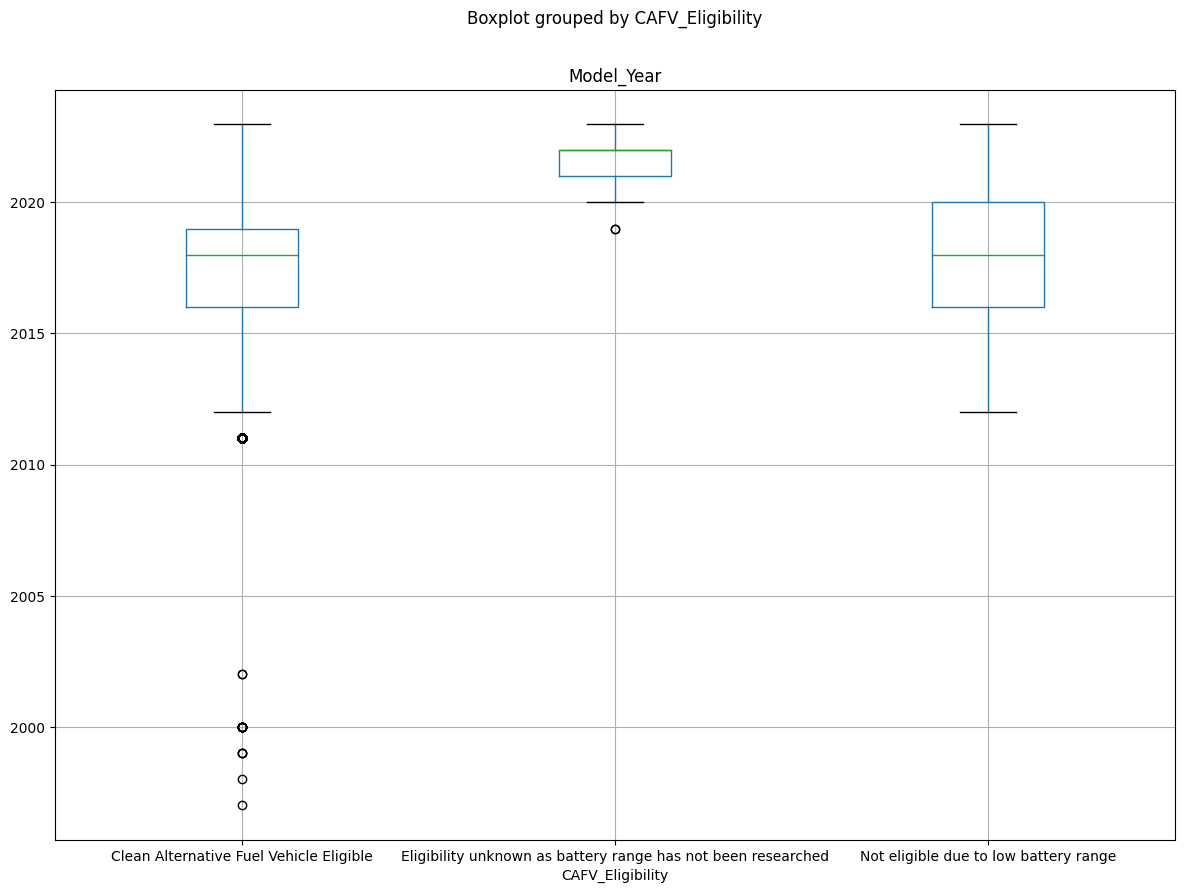

In [ ]:
df.boxplot(by="CAFV_Eligibility",column=['Model_Year'], figsize=(14, 10))

**<h1> Task 2 Creating a Choropleth using plotly.express to display the number of EV vehicles based on location.**

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
ev_count_by_pincode = df.groupby(['Postal_Code', 'Model_Year', 'State']).size().reset_index(name='Number_of_EV_Vehicles')

In [ ]:
state_data = ev_count_by_pincode[ev_count_by_pincode['State'] == 'WA']

In [ ]:
geojson_url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

In [ ]:
fig = px.choropleth_mapbox(state_data,
                           geojson=geojson_url,
                           locations='Postal_Code',
                           color='Number_of_EV_Vehicles',
                           featureidkey="properties.ZCTA5CE10",  # Make sure this matches the ZIP code field in the geojson
                           mapbox_style="carto-positron",
                           zoom=5,  # Adjust zoom level
                           center={"lat": 47.7511, "lon": -120.7401},  # Centering on Washington
                           title="Number of EV Vehicles by ZIP Code in Washington Over Time",
                           animation_frame="Model_Year",  # Animated by year
                           color_continuous_scale="Viridis",
                           hover_data=['Number_of_EV_Vehicles']  # Hover info
                          )

# Update layout for better fit and aesthetics
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the animated map
fig.show()

**<h1> Task 3 Creating a Racing Bar Plot to display the animation of EV Make and its count each year.**


In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bcr

In [ ]:
df = df.groupby(['Make', 'Model_Year']).size().reset_index(name='Number_of_Vehicles')

# Display the resulting DataFrame for verification
print(df)

      Make  Model_Year  Number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
200  VOLVO        2019                 190
201  VOLVO        2020                 162
202  VOLVO        2021                 580
203  VOLVO        2022                 882
204  VOLVO        2023                  21

[205 rows x 3 columns]


In [ ]:
# Create the animated racing bar plot with annotations
fig = px.bar(df,
             y='Make',  # Place Make on y-axis
             x='Number_of_Vehicles',  # Place the count of EV vehicles on the x-axis
             color='Make',  # Color each make differently
             animation_frame='Model_Year',  # Create animation by year
             orientation='h',  # Horizontal bar chart
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

# Update traces for displaying values
fig.update_traces(texttemplate='%{x}',  # Display the actual x-axis values (Number_of_Vehicles)
                  textposition='outside',  # Place the text outside the bars
                  textfont_size=16)  # Adjust the font size for better readability

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Show grid for better visibility
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,  # Hide legend as it's not necessary for this chart
    title_x=0.5,  # Center title
    title_font=dict(size=20),  # Increase title font size
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    width=800,  # Set a fixed width
    height=600  # Set a fixed height
)

# Show the plot
fig.show()